In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch

In [21]:
def produce_plots(df,lb, q1=0.25,q2=0.75):
    q1 = q1
    q2 = q2
    q3 = 0.5

    means = df.groupby('iteration').mean()
    q_lower = df.groupby(by='iteration').quantile(q=q1,interpolation='lower')
    q_mid = df.groupby(by='iteration').quantile(q=q3,interpolation='linear')
    q_higher = df.groupby(by='iteration').quantile(q=q2,interpolation='higher')
    
    f = plt.figure()
    
    ax1 = f.add_subplot()

    ax1.fill_between(x=range(len(means)), y1=q_lower['Loss'], y2=q_higher['Loss'],alpha=0.4)
    ax1.plot(q_lower['Loss'], label=f'Q{int(q1*100)}',c='black')
    ax1.plot(q_higher['Loss'], label=f'Q{int(q2*100)}',c='black')
    ax1.plot(q_mid['Loss'], label=f'Q{int(q3*100)}',c='black')
    ax1.plot(means['Loss'], label='Mean')

    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    f = plt.figure()
    ax2 = f.add_subplot()

    ax2.fill_between(x=range(len(means)), y1=q_lower['C1'], y2=q_higher['C1'],alpha=0.4)
    ax2.plot(q_lower['C1'], ls = '-', label=f'Q{int(q1*100)}',c='black')
    ax2.plot(q_higher['C1'], ls = '-', label=f'Q{int(q2*100)}',c='black')
    ax2.plot(q_mid['C1'], label=f'Q{int(q3*100)}',c='black')
    ax2.plot(means['C1'], label='Mean')

    ax2.set_xlabel('Iteration')
    # ax2.set_ylim(bottom=-0.02, top=0.02)
    ax2.hlines(y=[-lb, lb], xmin=0, xmax=len(means), ls='--',colors='blue', alpha=0.5, label='Constraint bound')
    ax2.hlines(y=0, xmin=0, xmax=len(means), ls='--', colors='black', alpha=0.5)
    ax2.set_ylabel('$L_w-L_b$')
    ax2.legend()
    
    plt.show()

In [41]:
DATASET = 'employment'
lb = 0.005
geomp = 0.1
sampling = 1
alg = 'AUG'

if alg == 'sg':
    filename = f'./src/experiments/utils/exp_results/{alg}_' + f'{DATASET}_{lb}_{geomp}_REPORT.csv'
else:
    filename = f'./src/experiments/utils/exp_results/{alg}_' + f'{DATASET}_{lb}_{sampling}_REPORT.csv'

In [42]:
stats = pd.read_csv(filename)
stats_train = stats[stats['is_train'] == 'train'].drop(['is_train'], axis=1)
stats_test = stats[stats['is_train'] == 'test'].drop(['is_train'], axis=1)

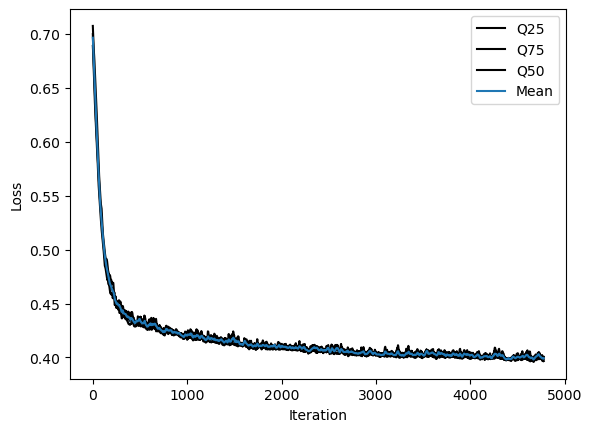

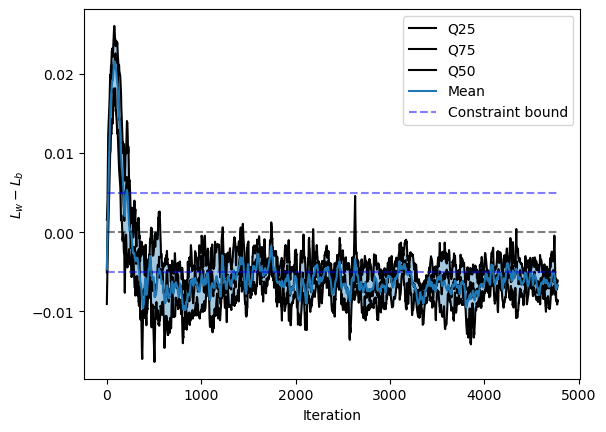

In [46]:
produce_plots(stats_train, lb)

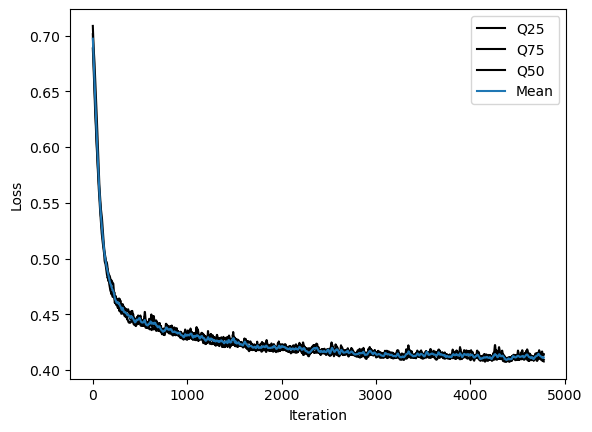

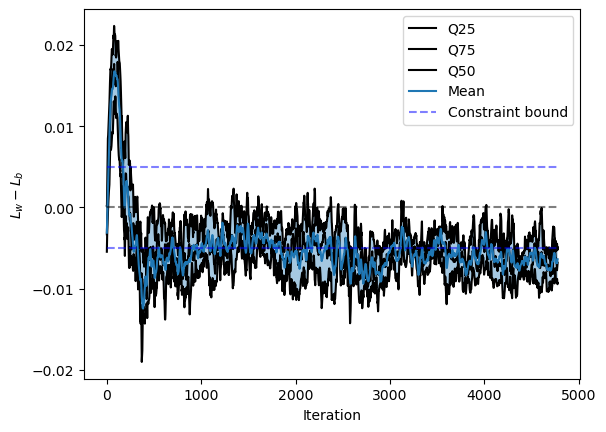

In [47]:
produce_plots(stats_test, lb)

**BELOW - DONT USE**

will add other plots (optimal threshold, etc) later

NameError: name 'obj_gh' is not defined

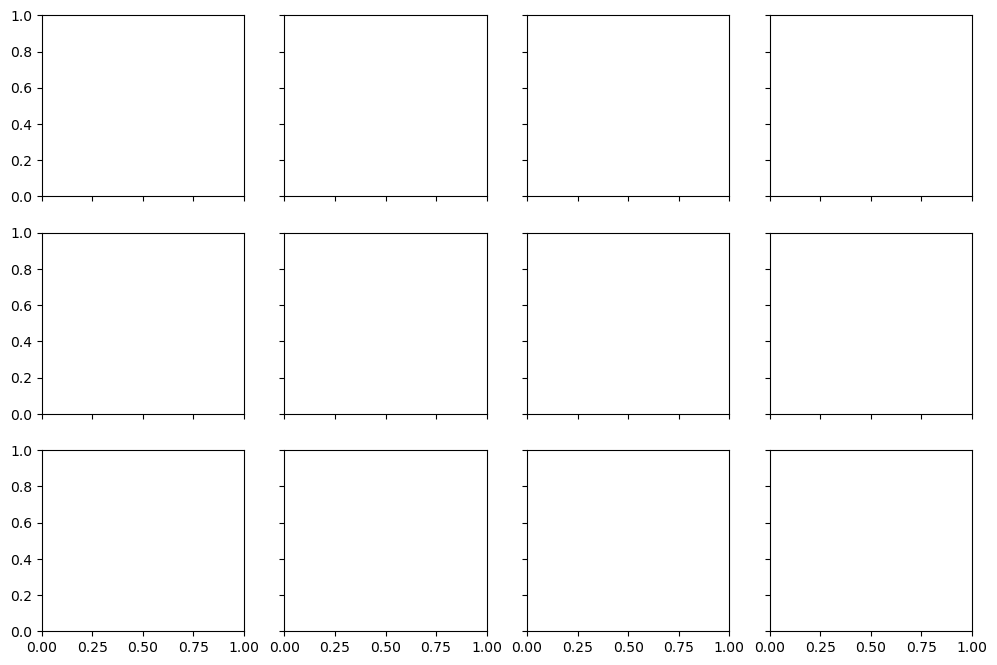

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8),sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each dataset in a separate subplot
for i, (data, ax) in enumerate(zip(obj_gh.T[1:], axes)):
    if i >= len(obj_gh.T):  # Skip extra axes if any
        break
    ax.plot(data, lw=0.4)
    plt.xlabel('Iteration')
    plt.ylabel('Loss value')

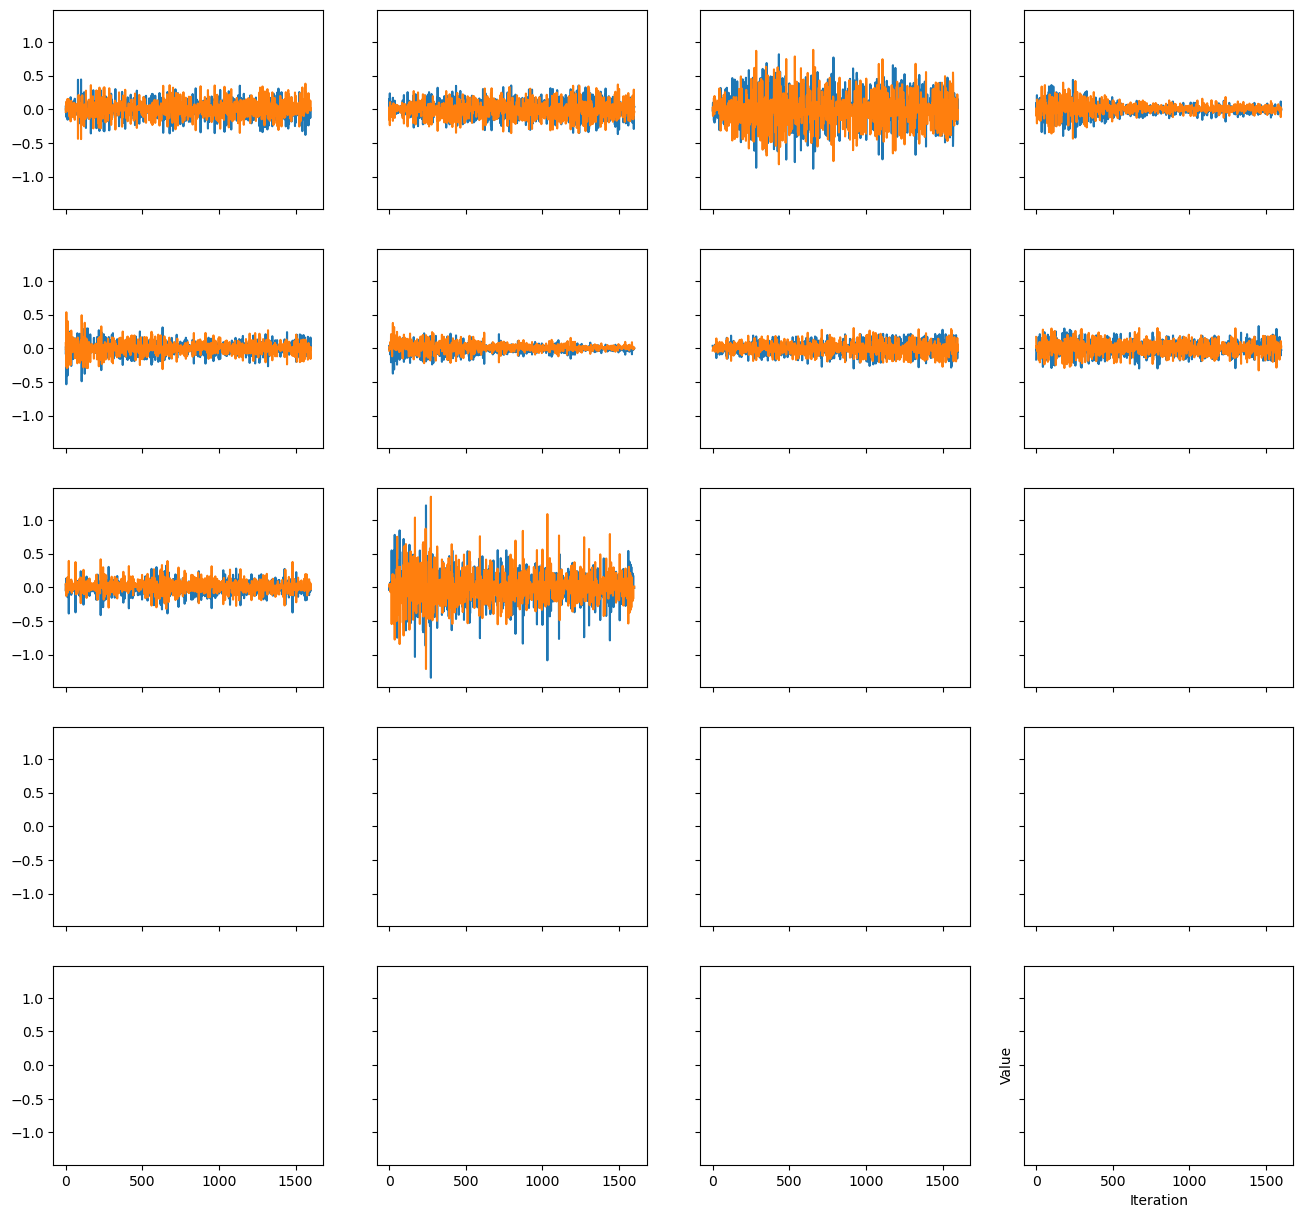

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 15),sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each dataset in a separate subplot
for i, (c1, c2, ax) in enumerate(zip(cons1_gh.T[1:], cons2_gh.T[1:], axes)):
    if i >= len(cons1_gh.T):  # Skip extra axes if any
        break
    ax.plot(c1)
    ax.plot(-c2)
    plt.xlabel('Iteration')
    plt.ylabel('Value')

NameError: name 'cons1_al' is not defined

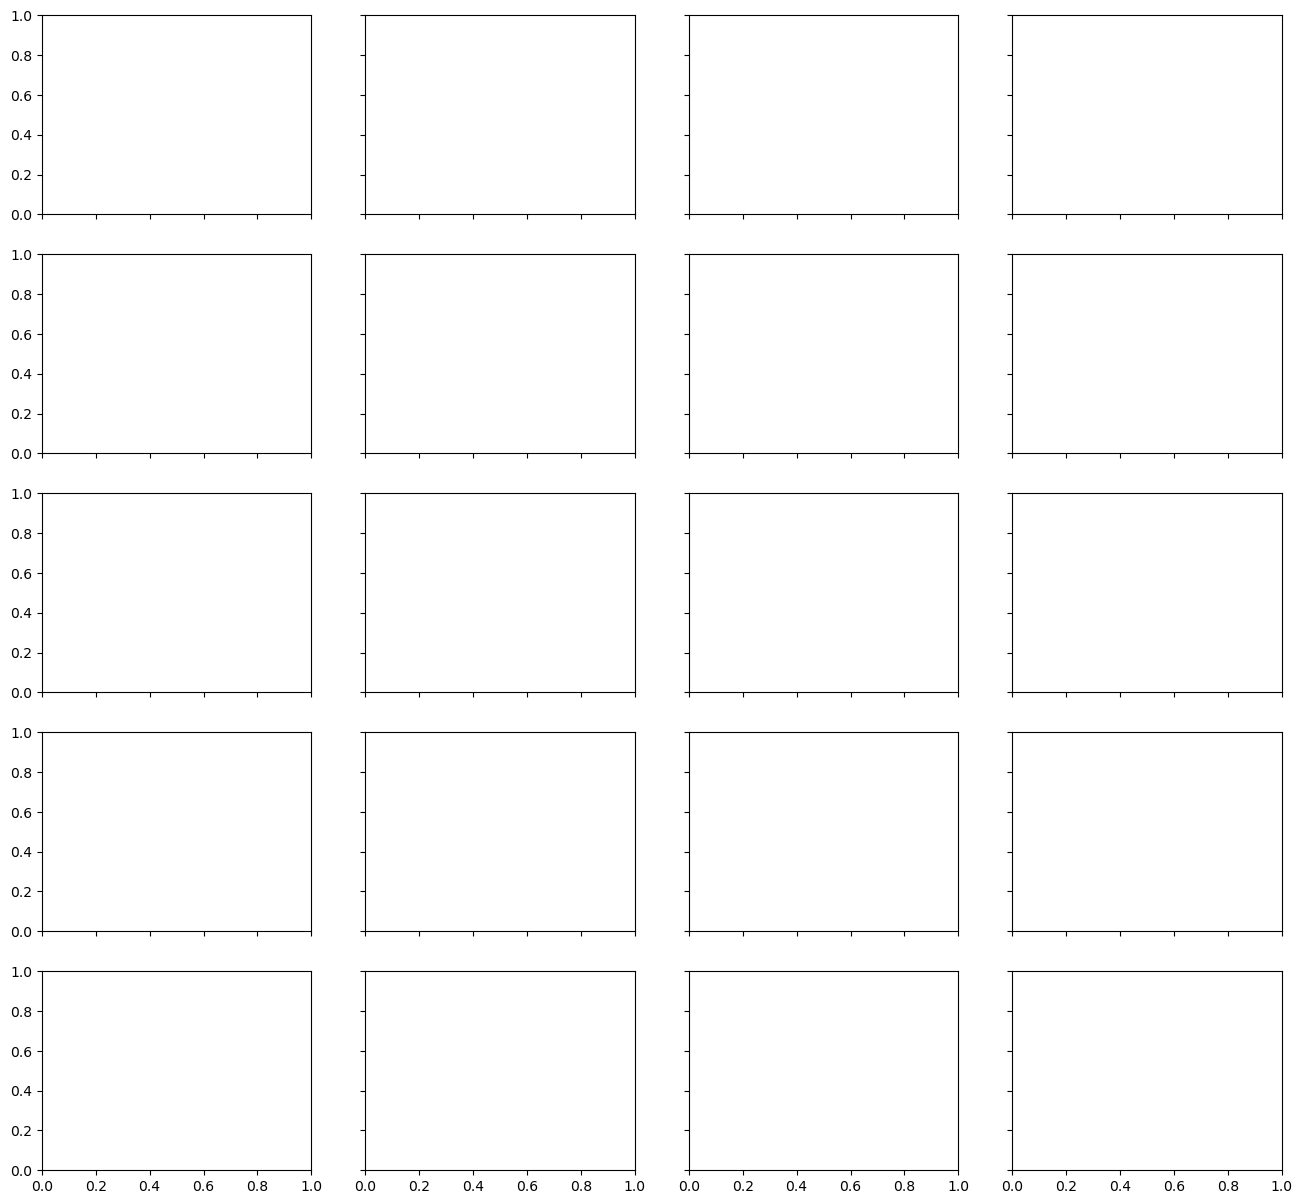

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 15),sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each dataset in a separate subplot
for i, (c1, c2, ax) in enumerate(zip(cons1_al.T[1:], cons2_al.T[1:], axes)):
    if i >= len(cons1_al.T):  # Skip extra axes if any
        break
    ax.plot(c1)
    ax.plot(-c2)
    plt.xlabel('Iteration')
    plt.ylabel('Value')

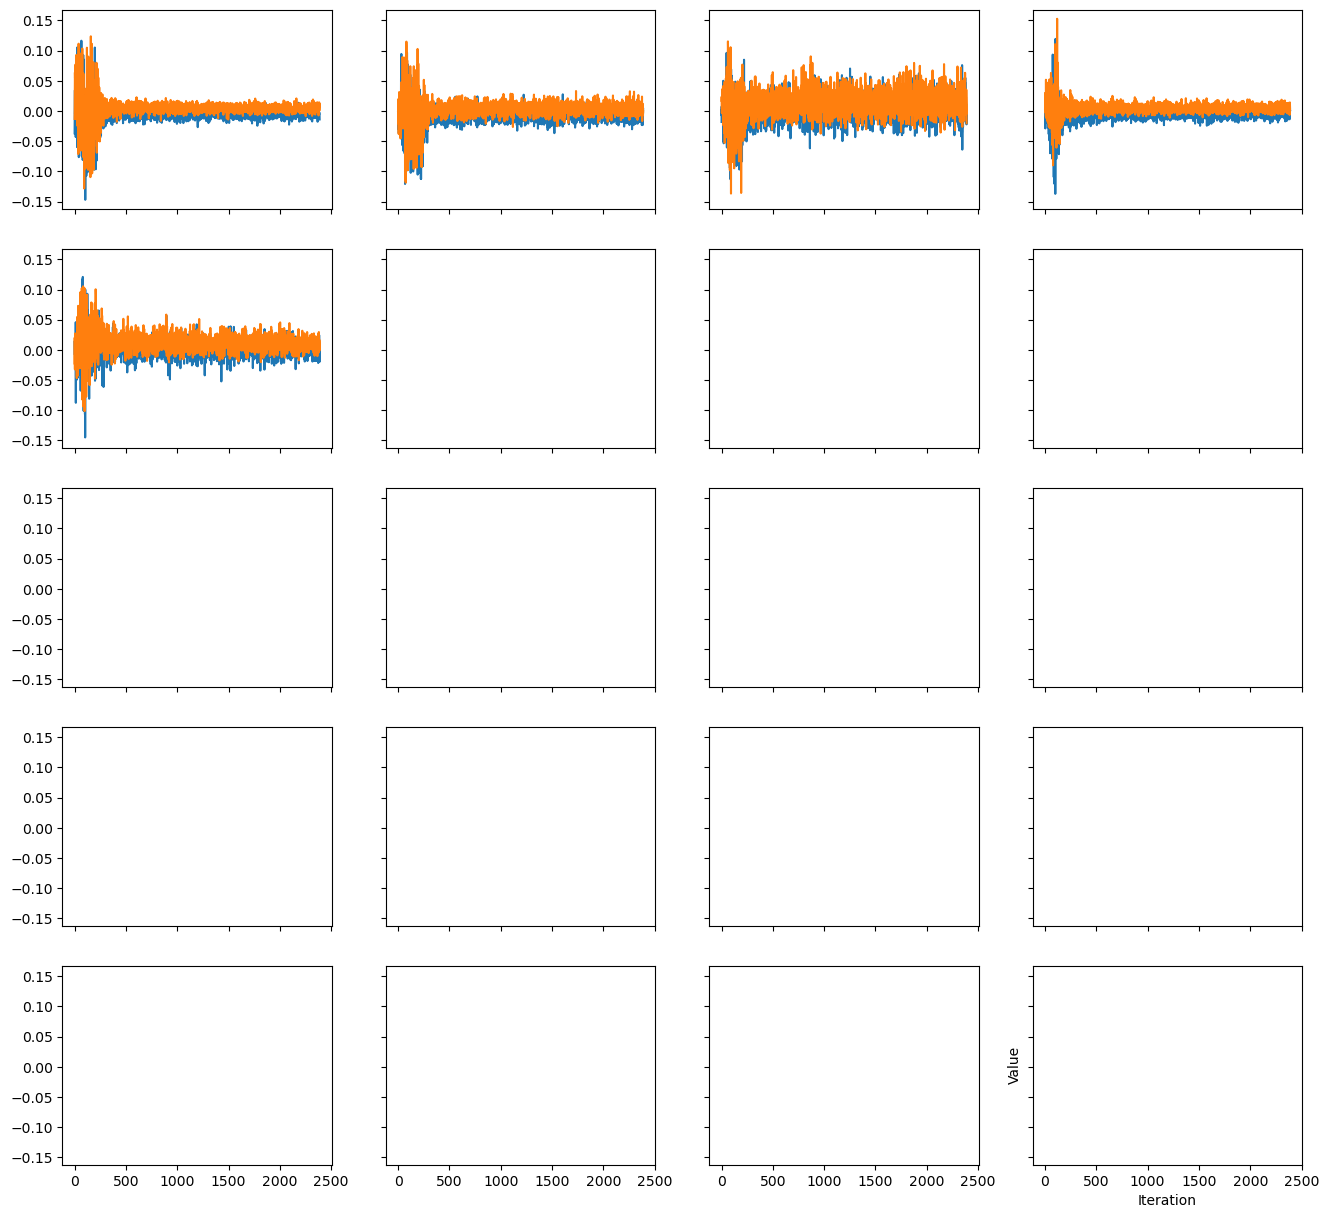

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 15),sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each dataset in a separate subplot
for i, (c1, c2, ax) in enumerate(zip(cons1_al.T[1:], cons2_al.T[1:], axes)):
    if i >= len(cons1_al.T):  # Skip extra axes if any
        break
    ax.plot(c1)
    ax.plot(-c2)
    plt.xlabel('Iteration')
    plt.ylabel('Value')

In [ ]:
plt.plot(range(0, len(cons_al)), np.mean(cons_al.T[:-1], axis=0), '-', lw=0.3)
# plt.fill_between(range(0, maxiter), cons_al[:, quart_ind], cons_al[:, three_quart_ind])
plt.xlabel('Iteration')
plt.ylabel('Loss value')
plt.plot()

NameError: name 'cons_al' is not defined

In [ ]:
for i in range(0, len(obj_al)):
    obj_al[i, :] = np.sort(obj_al[i, :])
    cons_al[i, :] = np.sort(cons_al[i, :])

quart_ind = int(obj_al.shape[1]/4)
mid_ind = int(obj_al.shape[1]/2)
three_quart_ind = int((3*obj_al.shape[1])/4)

IndexError: index 7000 is out of bounds for axis 0 with size 7000

In [ ]:
maxiter = len(cons_al)

[]

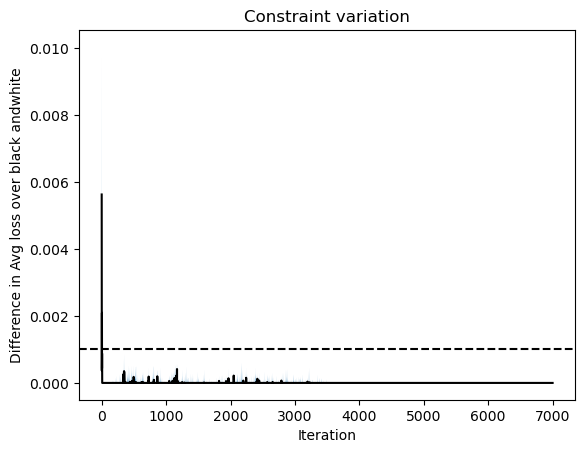

In [ ]:
plt.plot(range(0, len(cons_al)), cons_al[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons_al[:, quart_ind], cons_al[:, three_quart_ind])
#plt.axhline(y=-0.001, color='black', linestyle='--', label='Horizontal Line at y=3')
plt.axhline(y=lb, color='black', linestyle='--', label='Horizontal Line at y=3')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('Difference in Avg loss over '+str(sensitive_1_val)+' and'+ str(sensitive_0_val))
#plt.yscale('log')
plt.plot()

In [ ]:
plt.plot(range(0, maxiter), cons2_gh[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons2_gh[:, quart_ind], cons2_gh[:, three_quart_ind])
#plt.axhline(y=-0.001, color='black', linestyle='--', label='Horizontal Line at y=3')
plt.axhline(y=-lb, color='black', linestyle='--')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('Difference in Avg loss over '+str(sensitive_0_val)+' and'+ str(sensitive_1_val))
#plt.yscale('log')
plt.plot()

NameError: name 'cons2_gh' is not defined

In [ ]:
cons = (cons1_gh+cons2_gh)/2

: 

: 

: 

: 

: 

: 

: 

[]

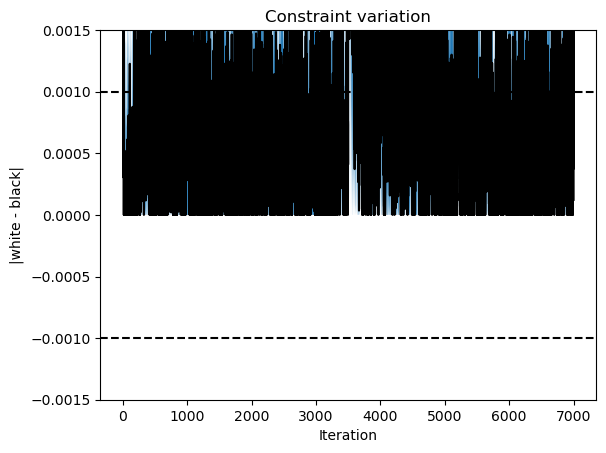

In [ ]:
plt.plot(range(0, maxiter), cons[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons[:, quart_ind], cons[:, three_quart_ind])
plt.axhline(y=-lb, color='black', linestyle='--')
plt.axhline(y=lb, color='black', linestyle='--')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.ylim(-1.5*lb, 1.5*lb)
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('|'+str(sensitive_0_val)+' - '+str(sensitive_1_val)+'|')
# plt.yscale('log')
plt.plot()

[]

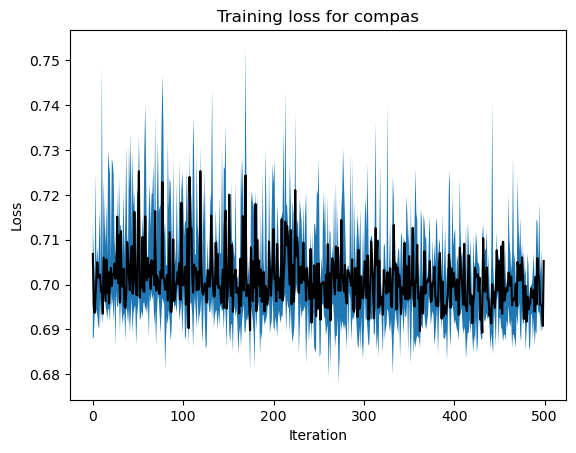

: 

: 

: 

: 

: 

: 

: 

In [ ]:
plt.plot(range(0, maxiter), obj_gh[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), obj_gh[:, quart_ind], obj_gh[:, three_quart_ind])
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Training loss for "+ DATASET)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot()